In [1]:
!wget https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step03/height_weight.txt

--2025-07-12 19:09:33--  https://raw.githubusercontent.com/oreilly-japan/deep-learning-from-scratch-5/main/step03/height_weight.txt
Connecting to 127.0.0.1:7890... connected.
Proxy request sent, awaiting response... 200 OK
Length: 525000 (513K) [text/plain]
Saving to: ‘height_weight.txt’

height_weight.txt   100%[===================>] 512.70K  1.02MB/s    in 0.5s    

2025-07-12 19:09:35 (1.02 MB/s) - ‘height_weight.txt’ saved [525000/525000]



- 等高线：3d surface 的 2d projection

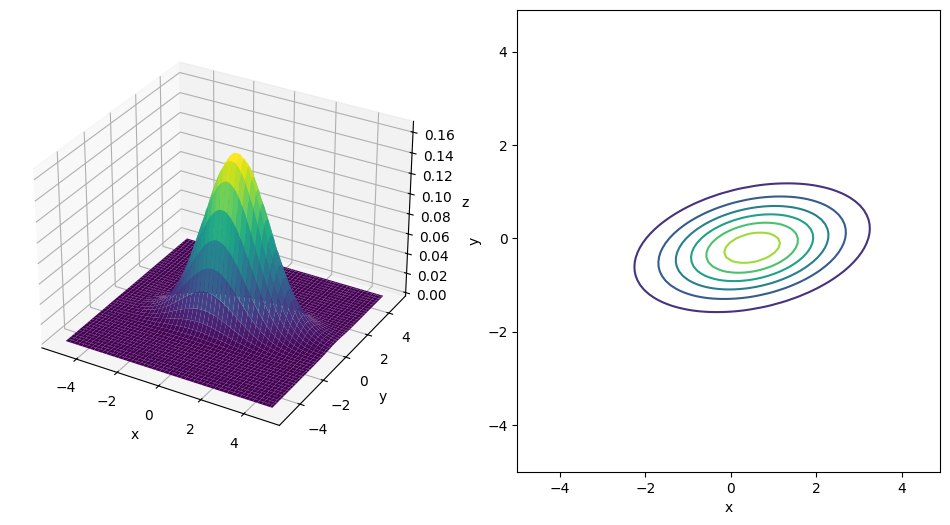

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def multivariate_normal(x, mu, cov):
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    D = len(x)
    z = 1 / np.sqrt((2 * np.pi) ** D * det)
    y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
    return y

mu = np.array([0.5, -0.2])
cov = np.array([[2.0, 0.3],
                [0.3, 0.5]])

xs = ys = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(xs, ys)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = multivariate_normal(x, mu, cov)

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot_surface(X, Y, Z, cmap='viridis')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.contour(X, Y, Z)